<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/perceptron_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [40]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU

model= keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

# model = keras.models.Sequential([
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
# LeakyReLU(alpha=0.1),
# keras.layers.Dense(1)
# ])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                270       
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
optimizer = tf.keras.optimizers.Adam(lr=0.05)
model.compile(loss= 'mean_squared_error', optimizer=optimizer)

history=model.fit(X_train, y_train, epochs=30,  batch_size= 256,
                  validation_data= (X_valid, y_valid))



Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


46/46 [==============================] - 1s 4ms/step - loss: 31523.2637 - val_loss: 19.8472
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 161.9499 - val_loss: 7.7765
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 4.8321 - val_loss: 2.8324
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 2.3705 - val_loss: 2.2585
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 2.0005 - val_loss: 1.9367
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 1.6961 - val_loss: 1.6759
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 1.4381 - val_loss: 1.3566
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 1.2311 - val_loss: 1.2233
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 1.1338 - val_loss: 1.1008
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 1.0272 - val_loss: 1.0178
Epoch 11/30
46/46 [====

In [43]:
from sklearn.metrics import mean_squared_error

y_pred= model.predict(X_test)
print(mean_squared_error(y_pred, y_test))

0.6510923340015351


In [44]:
##the prediction results are actually satisfactory

As we can see, the Sequential API is quite easy to use. However, although sequential
models are extremely common, it is sometimes useful to build neural networks with
more complex topologies, or with multiple inputs or outputs. For this purpose, Keras
offers the Functional API.

# Functional API

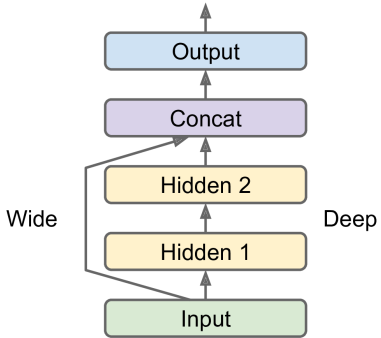



In [45]:
# functional API call

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2]) ##Concatenate() used in Sequential() model
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_34 (Dense)               (None, 30)           270         ['input_11[0][0]']               
                                                                                                  
 dense_35 (Dense)               (None, 30)           930         ['dense_34[0][0]']               
                                                                                                  
 concatenate_8 (Concatenate)    (None, 38)           0           ['input_11[0][0]',               
                                                                  'dense_35[0][0]']         

In [46]:
optimizer = tf.keras.optimizers.Adam(lr=0.05)
model.compile(loss= 'mean_squared_error', optimizer=optimizer)

history=model.fit(X_train, y_train, epochs=20,  batch_size= 256,
                  validation_data= (X_valid, y_valid))


y_pred= model.predict(X_test)
print(mean_squared_error(y_pred, y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


46/46 [==============================] - 1s 5ms/step - loss: 41344.9961 - val_loss: 507.8059
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 96.0705 - val_loss: 10.1123
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 3.5436 - val_loss: 3.8019
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 2.5739 - val_loss: 3.0506
Epoch 5/20
46/46 [==============================] - 0s 3ms/step - loss: 2.3846 - val_loss: 2.6700
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 2.2328 - val_loss: 2.4696
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 2.0896 - val_loss: 2.1648
Epoch 8/20
46/46 [==============================] - 0s 5ms/step - loss: 2.2274 - val_loss: 2.0906
Epoch 9/20
46/46 [==============================] - 0s 3ms/step - loss: 1.8495 - val_loss: 1.8600
Epoch 10/20
46/46 [==============================] - 0s 2ms/step - loss: 1.7143 - val_loss: 1.7280
Epoch 11/20
46/46 [===

* In practise, to make the most out of this construct, we can pass certain attributes through seep net while others are dealt in shallow.


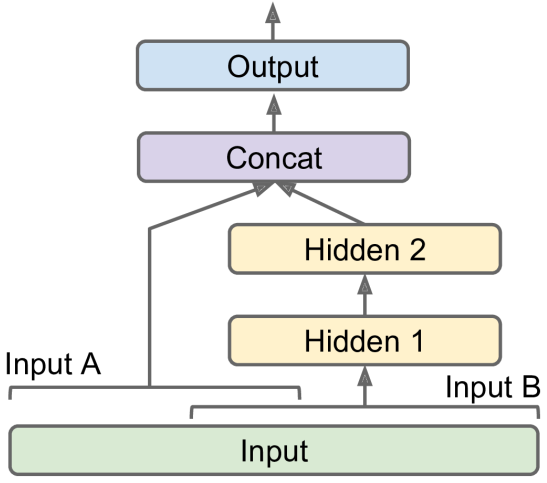

In [47]:
input_A = keras.layers.Input(shape=[5]) # features 0-4
input_B = keras.layers.Input(shape=[6]) # features 2-7
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 dense_37 (Dense)               (None, 30)           210         ['input_13[0][0]']               
                                                                                                  
 input_12 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 30)           930         ['dense_37[0][0]']               
                                                                                            

In [48]:
optimizer = tf.keras.optimizers.Adam(lr=0.05)
model.compile(loss= 'mean_squared_error', optimizer=optimizer)

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

y_pred= model.predict((X_test_A, X_test_B))
print(mean_squared_error(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 3593.5310 - val_loss: 1.8024
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 3.2581 - val_loss: 3.8085
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 3.7129 - val_loss: 20.4364
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 16.1638 - val_loss: 26.9455
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 75.9413 - val_loss: 2.5304
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 1.2311 - val_loss: 64.0254
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 3.1235 - val_loss: 2.4916
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 17.9655 - val_loss: 58.1405
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 8.4535 - val_loss: 24.0266
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 11.3710 - val_

**along same lines, we can have multiple outputs**

### uses
* tasks requiring clasification and regression
* regularization

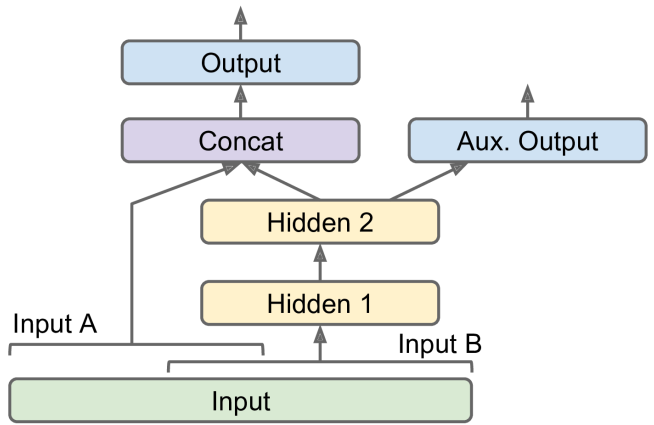

In [49]:
## implementing the same

input_A = keras.layers.Input(shape=[5]) # features 0-4
input_B = keras.layers.Input(shape=[6]) # features 2-7
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                          outputs=[output, aux_output])

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 30)           210         ['input_15[0][0]']               
                                                                                                  
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_41 (Dense)               (None, 30)           930         ['dense_40[0][0]']               
                                                                                            

Each output will need its own loss function, so when we compile the model we
should pass a list of losses (if we pass a single loss, Keras will assume that the same
loss must be used for all outputs). By default, Keras will compute all these losses and
simply add them up to get the final loss used for training

In [50]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))



Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 191011.5156 - dense_42_loss: 204907.1875 - dense_43_loss: 65952.1953 - val_loss: 42.1299 - val_dense_42_loss: 29.9405 - val_dense_43_loss: 151.8347
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 27.0131 - dense_42_loss: 24.2548 - dense_43_loss: 51.8375 - val_loss: 15.7128 - val_dense_42_loss: 14.8298 - val_dense_43_loss: 23.6598
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 9.6142 - dense_42_loss: 9.9313 - dense_43_loss: 6.7604 - val_loss: 2.1016 - val_dense_42_loss: 2.1787 - val_dense_43_loss: 1.4084
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6023 - dense_42_loss: 2.7429 - dense_43_loss: 1.3378 - val_loss: 1.4874 - val_dense_42_loss: 1.5023 - val_dense_43_loss: 1.3531
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9784 - dense_42_loss: 2.0496 - dense_43_loss: 1.3377 - val_loss: 1.2724 - val_dense_

In [51]:
y_pred_main, y_pred_aux = model.predict([X_test_A, X_test_B])
print('aux output error: ', mean_squared_error(y_pred_aux, y_test))
print('main output error: ', mean_squared_error(y_pred_main, y_test))

aux output error:  1.3077955433720616
main output error:  1.0769200585438774


**Though Functional() and Sequential() API have its advantages, they still remain static**
* Solution: use SubclassingAPI



```
class WideDeepModel( keras.models.Model):
  def __init__(self, units=30, activation="relu",   **kwargs):
    super().__init__(**kwargs)
    self.hidden1= keras.layers.Dense(units, activation=activation)
    self.hidden2= keras.layers.Dense(units, activation=activation)
    self.main_output= keras.layers.Dense(1)
    self.aux_output= keras.layers.Dense(1)

  def call(self, input): 
    '''we can do anything in call method
    for loops, if statements, low level commands
    this component brings out the power of Subclassing API'''
    input_A, input_B= input
    hidden1=self.hidden1(input_B)
    hidden2=self.hidden2(hidden1)
    concat=keras.layers.concatenate([hidden2, input_A])
    main_output=self.main_output(concat)
    aux_output=self.aux_output(hidden2)

model= WideDeepModel()
```

> look more into Subclassing APIZ

In [52]:
##saving and loading
model.save('my_multi_input_multi_output_funcyional_model.h5')
model=keras.models.load_model('my_multi_input_multi_output_funcyional_model.h5')

'''This will work when using the Sequential API or the Functional
API, but unfortunately not when using Model subclassing.'''

'This will work when using the Sequential API or the Functional\nAPI, but unfortunately not when using Model subclassing.'

## Using Callbacks
* ModelCheckpoint callback saves checkpoints of your model at regular intervals during
training, by default at the end of each epoch
* if we use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint .
* Another way to implement early stopping is to simply use the EarlyStopping callback.


In [55]:
'''making checkpoint and each iteration and saving if its the best so far'''

model= keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))
optimizer = tf.keras.optimizers.Adam(lr=0.05)
model.compile(loss= 'mean_squared_error', optimizer=optimizer)## build and compile model


checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 619.0608 - val_loss: 5.3759
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9964 - val_loss: 21.9644
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 2.8635 - val_loss: 32.2595
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 3.4432 - val_loss: 23.7397
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 3.4753 - val_loss: 10.2459
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6565 - val_loss: 1.8341
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8821 - val_loss: 1.0366
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0343 - val_loss: 2.3665
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 5.4844 - val_loss: 1.1834
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9543 - val_loss: 

In [56]:
'''further we can also implement early-stopping using callbacks'''

model= keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))
optimizer = tf.keras.optimizers.Adam(lr=0.05)
model.compile(loss= 'mean_squared_error', optimizer=optimizer)##building and compiling our model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) #no of epochs can be kept large as its going to stop early anyways

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 3684.2285 - val_loss: 1.2985
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1294 - val_loss: 1.1003
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9469 - val_loss: 1.1348
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8182 - val_loss: 1.3563
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8904 - val_loss: 3.4320
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9284 - val_loss: 11.6010
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 2.0495 - val_loss: 48.9800
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 6.6710 - val_loss: 24.8307
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 3.1431 - val_loss: 3.2380
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1718 - 